In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd 
# Pre_Season_Batter
preseason_df = pd.read_csv("/content/drive/MyDrive/코랩 드라이브 마운트 폴더/Pre_Season_Batter.csv")
# Regular_Season_Batter
regular_season_df = pd.read_csv("/content/drive/MyDrive/코랩 드라이브 마운트 폴더/Regular_Season_Batter.csv")

print("preseason_df.shape : ", preseason_df.shape)
print("regular_season_df.shape : ", regular_season_df.shape)

preseason_df.shape :  (1393, 29)
regular_season_df.shape :  (2454, 29)


In [3]:
#행열을 곱하는 것
# 1. np.matmul
# 2. np.dot


In [4]:
#행열 곱할 때
'''
x = (1,4) -> 행 1, 열 4
y = (3,4) -> 행 3, 열 4

=>크기가 같지 않아서 곱하기가 안됨, '좌항' 이 맞아야함
-> 행렬곱 -> shape(?,?)

->y를 치환해주면 됨,
=>y^T = (4,3) ->행 4, 열 3
-> 행렬 곱 ->(1,3)'''

"\nx = (1,4) -> 행 1, 열 4\ny = (3,4) -> 행 3, 열 4\n\n=>크기가 같지 않아서 곱하기가 안됨, '좌항' 이 맞아야함\n-> 행렬곱 -> shape(?,?)\n\n->y를 치환해주면 됨,\n=>y^T = (4,3) ->행 4, 열 3\n-> 행렬 곱 ->(1,3)"

In [5]:
regular_season_df.head(3)
regular_season_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        2454 non-null   int64  
 1   batter_name      2454 non-null   object 
 2   year             2454 non-null   int64  
 3   team             2454 non-null   object 
 4   avg              2428 non-null   float64
 5   G                2454 non-null   int64  
 6   AB               2454 non-null   int64  
 7   R                2454 non-null   int64  
 8   H                2454 non-null   int64  
 9   2B               2454 non-null   int64  
 10  3B               2454 non-null   int64  
 11  HR               2454 non-null   int64  
 12  TB               2454 non-null   int64  
 13  RBI              2454 non-null   int64  
 14  SB               2454 non-null   int64  
 15  CS               2454 non-null   int64  
 16  BB               2454 non-null   int64  
 17  HBP           

In [6]:
#하나의 열로 축소시킬 수 있지 않을까?
#batter name과 year을 합쳐볼까?

#새로운 인덱스를 만들어보자

regular_season_df['new_idx'] = regular_season_df['batter_name'] + \
regular_season_df['year'].apply(str)

#apply함수를 써서 숫자열을 문자열로 바꿔 줄 것임 = apply(str)

In [7]:
regular_season_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        2454 non-null   int64  
 1   batter_name      2454 non-null   object 
 2   year             2454 non-null   int64  
 3   team             2454 non-null   object 
 4   avg              2428 non-null   float64
 5   G                2454 non-null   int64  
 6   AB               2454 non-null   int64  
 7   R                2454 non-null   int64  
 8   H                2454 non-null   int64  
 9   2B               2454 non-null   int64  
 10  3B               2454 non-null   int64  
 11  HR               2454 non-null   int64  
 12  TB               2454 non-null   int64  
 13  RBI              2454 non-null   int64  
 14  SB               2454 non-null   int64  
 15  CS               2454 non-null   int64  
 16  BB               2454 non-null   int64  
 17  HBP           

In [70]:
preseason_df['new_idx'] = preseason_df['batter_name'] + \
preseason_df['year'].apply(str)

In [71]:
preseason_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        1393 non-null   int64  
 1   batter_name      1393 non-null   object 
 2   year             1393 non-null   int64  
 3   team             1393 non-null   object 
 4   avg              1393 non-null   object 
 5   G                1393 non-null   int64  
 6   AB               1393 non-null   int64  
 7   R                1393 non-null   int64  
 8   H                1393 non-null   int64  
 9   2B               1393 non-null   int64  
 10  3B               1393 non-null   int64  
 11  HR               1393 non-null   int64  
 12  TB               1393 non-null   int64  
 13  RBI              1393 non-null   int64  
 14  SB               1393 non-null   int64  
 15  CS               1393 non-null   int64  
 16  BB               1393 non-null   int64  
 17  HBP           

In [72]:
#두 열을 하나로 중복없이 합쳐주는 작업

intersection_idx = list(set(regular_season_df['new_idx']).\
                        intersection(preseason_df['new_idx']))

In [73]:
print(intersection_idx)

['김성욱2015', '손시헌2018', '이종욱2015', '박기혁2002', '정수빈2010', '백창수2015', '김용의2017', '한승택2017', '이진영2003', '김회성2010', '김재성2015', '김태균2016', '손아섭2010', '최영진2017', '김지수2017', '최준석2010', '임병욱2016', '서건창2013', '김상수2009', '이종욱2013', '이성곤2017', '김응민2014', '채태인2017', '나주환2003', '이대호2005', '유한준2018', '유한준2015', '모창민2014', '이대형2003', '노수광2017', '안치홍2011', '김재환2008', '최정민2016', '최원준2017', '안익훈2018', '양석환2017', '황재균2015', '박기혁2007', '임훈2010', '손아섭2016', '박건우2018', '최형우2011', '허도환2013', '양석환2015', '정훈2014', '손아섭2017', '양종민2015', '김주찬2008', '오재원2012', '홍창기2016', '모창민2018', '장민석2014', '김회성2017', '유강남2015', '유한준2010', '최형우2008', '강진성2018', '백용환2014', '황재균2016', '최주환2008', '허경민2016', '강진성2017', '러프2018', '서동욱2018', '이종욱2014', '박승욱2017', '이진영2014', '김사훈2012', '김주찬2002', '손아섭2018', '김주찬2003', '임훈2014', '지석훈2012', '김상수2017', '류지혁2016', '오태곤2017', '안중열2016', '이형종2016', '지석훈2005', '김성현2012', '이명기2016', '김지수2015', '장민석2017', '전준우2008', '조동찬2002', '이대수2005', '이용규2015', '양의지2013', '정범모2006', '정의윤2017', '나지완2009', '이

In [74]:
len(intersection_idx) # 값이 강사님과 다름

1358

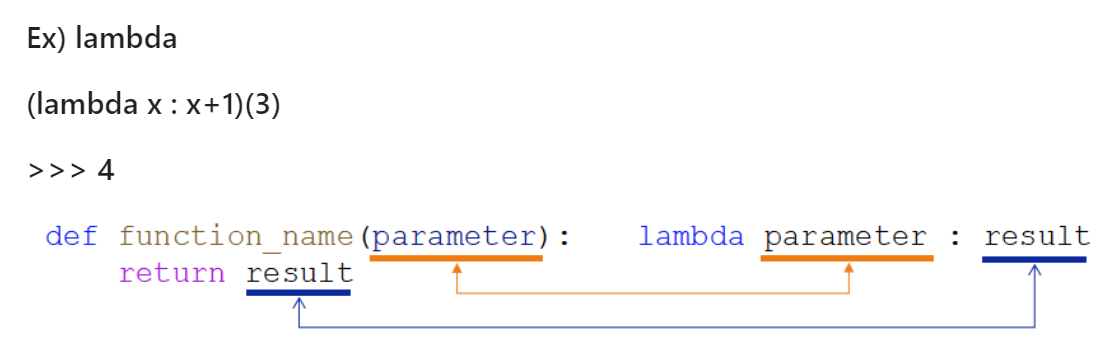

In [75]:
def x_3(x):
    y = x + 3
    return y

x_3(1)

4

In [76]:
#람다식을 앞으로 많이 이용할 것임

x = 0
(lambda x : x + 3)(1)


4

In [77]:
regular_season_new = regular_season_df.loc[regular_season_df['new_idx'].
                                           apply(lambda x : x in intersection_idx)]

# loc?
#regular_season_df['new_idx'].\apply(lamda) x : x in intersection_idx


#참과 거짓을 출력할 것임
#포함이 되어있으면 참을 안되어있으면 거짓을 뜨게할 것임

In [78]:
regular_season_df['new_idx'].apply(lambda x : x in intersection_idx)[-10:]

2444     True
2445    False
2446    False
2447    False
2448    False
2449     True
2450    False
2451    False
2452    False
2453    False
Name: new_idx, dtype: bool

In [79]:
regular_season_new[-2:]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
2444,342,황재균,2018,KT,0.296,142,530,76,157,41,3,25,279,88,14,7,49,4,120,5,0.526,0.358,17,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.884,황재균2018
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000,황진수2014


In [80]:
regular_season_new[5:15]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
5,1,강경학,2017,한화,0.214,59,84,17,18,2,1,0,22,4,1,1,8,1,19,1,0.262,0.290,4,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.552,강경학2017
7,2,강구성,2013,NC,0.000,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.000,강구성2013
9,2,강구성,2016,NC,0.000,2,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.000,강구성2016
10,2,강구성,2017,NC,0.000,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.000,강구성2017
38,3,강민국,2014,NC,0.000,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,2,176cm/80kg,1992년 01월 10일,내야수(우투우타),송정동초-충장중-광주제일고-동국대-NC-상무,20000만원,0.000,강민국2014
39,3,강민국,2015,NC,0.000,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,0,176cm/80kg,1992년 01월 10일,내야수(우투우타),송정동초-충장중-광주제일고-동국대-NC-상무,20000만원,0.000,강민국2015
40,3,강민국,2016,NC,0.130,24,23,2,3,1,0,1,7,1,0,0,2,0,9,1,0.304,0.200,4,176cm/80kg,1992년 01월 10일,내야수(우투우타),송정동초-충장중-광주제일고-동국대-NC-상무,20000만원,0.504,강민국2016
43,4,강민호,2005,롯데,0.243,104,214,20,52,11,2,2,73,18,1,4,5,2,56,7,0.341,0.267,9,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,0.608,강민호2005
44,4,강민호,2006,롯데,0.251,126,410,40,103,20,0,9,150,53,4,1,23,11,78,5,0.366,0.307,12,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,0.673,강민호2006
45,4,강민호,2007,롯데,0.271,125,413,48,112,20,0,14,174,68,1,4,37,4,88,10,0.421,0.335,11,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,0.756,강민호2007


In [81]:
regular_season_new = regular_season_new.sort_values(by='new_idx').reset_index(drop = True)

#true 값이 아니라 false 값을 쓰게 되면 index가 생성되는 것을 막을 수 있음
#이게 전처리의 과정이라함

In [82]:
regular_season_new[5:15]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
5,1,강경학,2017,한화,0.214,59,84,17,18,2,1,0,22,4,1,1,8,1,19,1,0.262,0.290,4,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.552,강경학2017
6,2,강구성,2013,NC,0.000,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.000,강구성2013
7,2,강구성,2016,NC,0.000,2,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.000,강구성2016
8,2,강구성,2017,NC,0.000,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.000,강구성2017
9,3,강민국,2014,NC,0.000,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,2,176cm/80kg,1992년 01월 10일,내야수(우투우타),송정동초-충장중-광주제일고-동국대-NC-상무,20000만원,0.000,강민국2014
10,3,강민국,2015,NC,0.000,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,0,176cm/80kg,1992년 01월 10일,내야수(우투우타),송정동초-충장중-광주제일고-동국대-NC-상무,20000만원,0.000,강민국2015
11,3,강민국,2016,NC,0.130,24,23,2,3,1,0,1,7,1,0,0,2,0,9,1,0.304,0.200,4,176cm/80kg,1992년 01월 10일,내야수(우투우타),송정동초-충장중-광주제일고-동국대-NC-상무,20000만원,0.504,강민국2016
12,4,강민호,2005,롯데,0.243,104,214,20,52,11,2,2,73,18,1,4,5,2,56,7,0.341,0.267,9,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,0.608,강민호2005
13,4,강민호,2006,롯데,0.251,126,410,40,103,20,0,9,150,53,4,1,23,11,78,5,0.366,0.307,12,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,0.673,강민호2006
14,4,강민호,2007,롯데,0.271,125,413,48,112,20,0,14,174,68,1,4,37,4,88,10,0.421,0.335,11,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,0.756,강민호2007


In [83]:
print(regular_season_new.shape, preseason_df.shape)

(1358, 30) (1393, 30)


In [84]:
####################################################################################################
preseason_new = preseason_df.loc[preseason_df['new_idx'].apply(lambda x: x in intersection_idx)]
preseason_new = preseason_new.sort_values(by = 'new_idx').reset_index(drop=True)
####################################################################################################

In [85]:
print(regular_season_new.shape, preseason_df.shape)

(1358, 30) (1393, 30)


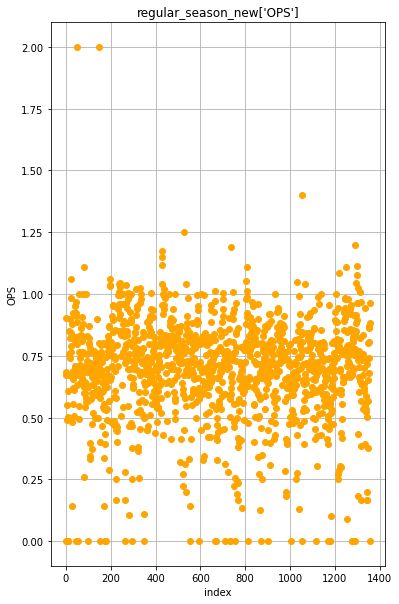

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,10))
plt.plot(regular_season_new['OPS'], 'o', color = 'orange')
plt.title("regular_season_new['OPS']")
plt.xlabel('index')
plt.ylabel('OPS')
plt.grid()
plt.show()

In [88]:
corr = regular_season_new['OPS'].corr(preseason_new['OPS'])

In [89]:
import seaborn as sns
import numpy as np

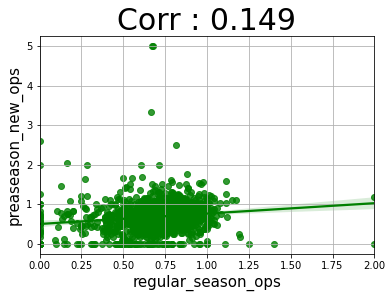

In [90]:
sns.regplot(x = regular_season_new['OPS'],
            y = preseason_new['OPS'],
            fit_reg = True,
            color = 'green')
plt.title("Corr : {}".format(np.round(corr,3)),
          fontsize = 30)
plt.xlabel("regular_season_ops", fontsize = 15)
plt.ylabel("preaseason_new_ops", fontsize = 15)

plt.grid()
plt.show()